In [1]:
## Set file date for use. As of October, this is Oct262018
filedate = 'Apr212019'

In [2]:
file_name = '/Users/croth/Downloads/Tecan-fine-mapping-Apr212019-withprevious.csv'

In [3]:
## Bring in the mod pandas
import pandas as pd

In [4]:
## Bring in file
tecan = pd.read_csv(file_name)

In [5]:
tecan.head()

,date,exp,plate,rep,row,column,strain,type,background,temp,...,251100s,252000s,252901s,253800s,254700s,255601s,256500s,257400s,258301s,259200s
0,Apr32019,FM,FM1,FM1a,a,1,blank,none,NaN,37C,...,0.0011,0.0011,0.0011,0.0011,0.0011,0.0011,0.0011,0.0011,0.0011,0.0011
1,Apr32019,FM,FM1,FM1a,a,2,blank,none,NaN,37C,...,-0.0009,-0.0009,-0.0009,-0.0009,-0.0009,-0.0009,-0.0009,-0.0009,-0.0009,-0.0009
2,Apr32019,FM,FM1,FM1a,a,3,blank,none,NaN,37C,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
3,Apr32019,FM,FM1,FM1a,a,4,blank,none,NaN,37C,...,-0.0009,-0.0009,-0.0009,-0.0009,-0.0009,-0.0009,-0.0009,-0.0009,-0.0009,-0.0009
4,Apr32019,FM,FM1,FM1a,a,5,blank,none,NaN,37C,...,0.0011,0.0011,0.0011,0.0011,0.0011,0.0011,0.0011,0.0011,0.0011,0.0011


In [6]:
tecan.shape

(3456, 302)

In [7]:
tecan.strain.unique().shape

(297,)

In [10]:
tecan[['temp','amphB']].drop_duplicates()

,temp,amphB
0,37C,0ug
96,37C,0.125ug
3264,30C,0.125ug
3360,39C,0ug


In [12]:
## What unique plates are there?
tecan.plate.unique()

array(['FM1', 'qtl', 'FM2', 'FM3'], dtype=object)

In [14]:
## Unique temperatures?
tecan.temp.unique()

array(['37C', '30C', '39C'], dtype=object)

In [28]:
print(list(tecan.columns.tolist()[:13]))

['date', 'exp', 'plate', 'rep', 'row', 'column', 'strain', 'type', 'background', 'temp', 'amphB', 'instrument', 'saturatedOD']


In [33]:
tecan.type.unique()

array(['none', 'segregant', 'parent', 'origparent'], dtype=object)

In [40]:
tecan[(tecan.plate=='qtl')].strain.unique().shape

(120,)

In [34]:
## Filter data
data = tecan[(tecan.strain != 'blank') &      ## We don't need these. DM already did blank correction
              (tecan.date != 'Oct82017') &    ## Pre-culture plate wasn't shaken, poor growth
              (tecan.date != 'Nov162018') &   ## pre-culture was incubated incorrectly, at 37 for 24hrs
              (tecan['plate'] != 'qtl')       ## Just the qtl plates, not the others
            ].copy()

In [37]:
data.strain.unique().shape

(180,)

In [53]:
import numpy as np

In [64]:
sample_ints = np.array(sorted([a[:-1] 
                        for a in open('../FILES/fine_mapped_ints.txt').readlines()]))

In [80]:
len(sample_ints)

192

In [81]:
sample_ints[:5]

array(['1', '10', '100', '101', '102'], dtype='<U3')

In [68]:
[a for a in data.strain.unique() if a not in sample_ints]

['CF1705', 'CF1706', 'CF1707', 'CF1730', '431', 'XL280a', 'XL280alpha']

In [76]:
len([a for a in data.strain.unique() if a not in sample_ints])

7

In [75]:
np.array([a for a in sample_ints if a not in data.strain.unique()])

array(['168', '169', '180', '181', '182', '183', '184', '185', '186',
       '187', '188', '189', '190', '191', '192', '93', '94', '95', '96'],
      dtype='<U3')

In [73]:
len(np.array([a for a in sample_ints if a not in data.strain.unique()]))

19

In [79]:
len([a for a in sample_ints if a in data.strain.tolist()])

173

In [89]:
data.temp.unique()

array(['37C', '30C', '39C'], dtype=object)

In [90]:
data[(data.strain=='1')]

,date,exp,plate,rep,row,column,strain,type,background,temp,...,251100s,252000s,252901s,253800s,254700s,255601s,256500s,257400s,258301s,259200s
240,Apr112019,FM,FM3,FM3a,b,2,1,segregant,NaN,37C,...,0.4053,0.4043,0.4053,0.4063,0.4053,0.4063,0.4053,0.4053,0.4053,0.4053
300,Apr112019,FM,FM3,FM3a,b,2,1,segregant,NaN,37C,...,0.4139,0.4139,0.4139,0.4139,0.4149,0.4149,0.4149,0.4139,0.4159,0.4149
613,Apr212019,FM,FM3,FM3b,c,5,1,segregant,NaN,37C,...,0.4210,0.4220,0.4230,0.4250,0.4260,0.4270,0.4260,0.4280,0.4280,0.4290
679,Apr212019,FM,FM3,FM3b,c,5,1,segregant,NaN,37C,...,0.4278,0.4338,0.4378,0.4428,0.4418,0.4468,0.4498,0.4518,0.4558,0.4598


In [84]:
dg = data.groupby(['strain','temp','amphB',]).agg({'0s':['count']})

In [85]:
dg.head()

0s
                    count
strain temp amphB        
1      37C  0.125ug     2
            0ug         2
10     37C  0.125ug     2
            0ug         2
100    37C  0.125ug     2

In [87]:
## Reset the data index
data.reset_index(drop=True,inplace=True)

In [88]:
## Print shape of dataframe
data.shape

(1080, 302)

In [14]:
## Write ftns we will need for later
def temp_convert(x):
    return int(x[:-1])

def length_convert(x):
    return int(x[:2])

def plate_convert(x):
    return int(x[-1])

def amphB_convert(x):
    return round(float(x[:-2]),3)

In [15]:
## Print the durg concentrations and check our conversion ftn
sorted([amphB_convert(a) for a in data.amphB.unique()])

[0.0, 0.075, 0.125, 0.175]

In [16]:
## Convert data (ignore the warning)
data.loc[:,'temp'] = data.loc[:,'temp'].apply(temp_convert)
data.loc[:,'length'] = data.loc[:,'length'].apply(length_convert)
data.loc[:,'plate'] = data.loc[:,'plate'].apply(plate_convert)
data.loc[:,'amphB'] = data.loc[:,'amphB'].apply(amphB_convert)

In [17]:
## Take unique dates
unique_dates = data.date.unique()

In [18]:
## Convert these dates
months = [un[:3] for un in unique_dates]
days = [int(un[3:-4]) for un in unique_dates]
year = [int(un[-4:]) for un in unique_dates]

In [19]:
## Bring in calendar mod
import calendar

In [20]:
## Make a month dictionary
month_dict = [dict((v,k) for k,v in enumerate(calendar.month_abbr))][0]

In [21]:
## Make a month dataframe
month_df = pd.DataFrame([unique_dates,days,months,year],
                        index=['date','day','month','year']).T

In [22]:
## Sort the values in month dataframe
month_df['month'] = month_df['month'].map(month_dict)
month_df.sort_values(['year','month','day'],inplace=True)
month_df.reset_index(drop=True,inplace=True)

In [23]:
## Set path to save month dataframe
month_df_save = '../FILES/Tecan_qtlruns_%s_dates.csv'%(filedate)

In [24]:
## Bring in matplot lib
from matplotlib import pyplot as plt
%matplotlib inline

In [25]:
## Bring in seaborn
import seaborn as sns

In [26]:
## Set coloring and background
plt.style.use(['dark_background',
               'tableau-colorblind10'])

In [27]:
## Make filename for saving figure
save_sat_OD = '../FIGURES/' + file_name.split('/')[-1
        ].split('.c')[0] + '_saturation_OD.png'

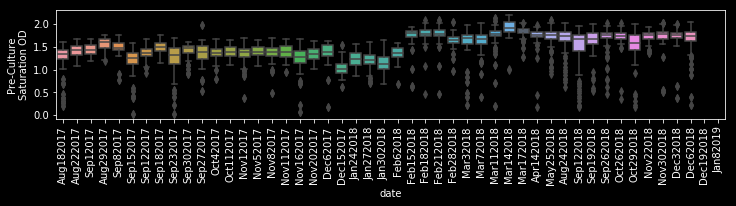

In [28]:
## Make a figure for pre culture saturation OD
fig,ax = plt.subplots(figsize=(12,2))
sns.boxplot(x='date',y='saturatedOD',
            data=data);
plt.xticks(rotation=90);
plt.ylabel('Pre-Culture\nSaturation OD')
if save_sat_OD is not None:
    plt.savefig(save_sat_OD,dpi=100,bbox_inches='tight');

In [29]:
## What is the date of the batch effect?
bdate = 'Feb152018'

In [31]:
## Bring in numpy
import numpy as np

In [32]:
## Add batch code to each date
month_df['batched'] = [0 for i in np.arange(0,
    month_df[(month_df.date==bdate)].index[0])] + [1 for i in np.arange(
    month_df[(month_df.date==bdate)].index[0]+1,month_df.shape[0]+1)]

In [33]:
## save month dataframe
month_df.to_csv(month_df_save)

In [34]:
## Drop last 30 mins of data as it seems we don't have it for all data
data.drop(data.columns.tolist()[-2:],
          axis=1,inplace=True)

In [35]:
## Sort data one last time by temp, drug, and strain
data.sort_values(by=['temp','amphB','strain'],inplace=True)

In [36]:
## Reset the index
data.reset_index(inplace=True,drop=True)

In [37]:
## Check the shape one last time
data.shape

(5220, 298)

In [38]:
## Save data
data.to_csv('../FILES/'+file_name.split('/')[-1
                ].split('.csv')[0]+'_curated.csv')

In [39]:
## Plot replicates for DM at 39 with 0.0 amphB
htg = data[(data.temp==39) & (data.amphB==0.0)]

In [40]:
## What is its shape?
htg.shape

(480, 298)

In [41]:
## Gather the unique strains
uss = htg.strain.unique()

In [42]:
## Get unique dates in the high temp growth
htg_dates = htg.date.unique()

In [43]:
## Make a color map by date. How many are their?
len(htg_dates)

5

In [44]:
## make color map
color_map = pd.DataFrame([('tab:blue','grey',
                           'tab:orange','tab:brown'),
                          htg_dates],
                         index=['color','date']).T

In [45]:
## Take the columns from the high temp growth 
htg_c = htg.columns.tolist()

In [46]:
## get the starting index of the time
timeix = htg_c.index('0s')

In [47]:
## Make a time vector
time = np.round(np.linspace(
    int(htg_c[timeix][:-1]),
    int(htg_c[-1][:-1])/(60**2),
    len(htg_c[timeix:])),2)

In [48]:
## Make filename for saving figure
htg_OD = '../FIGURES/' + file_name.split('/')[-1
        ].split('.c')[0] + '_htg39C_replicates.pdf'

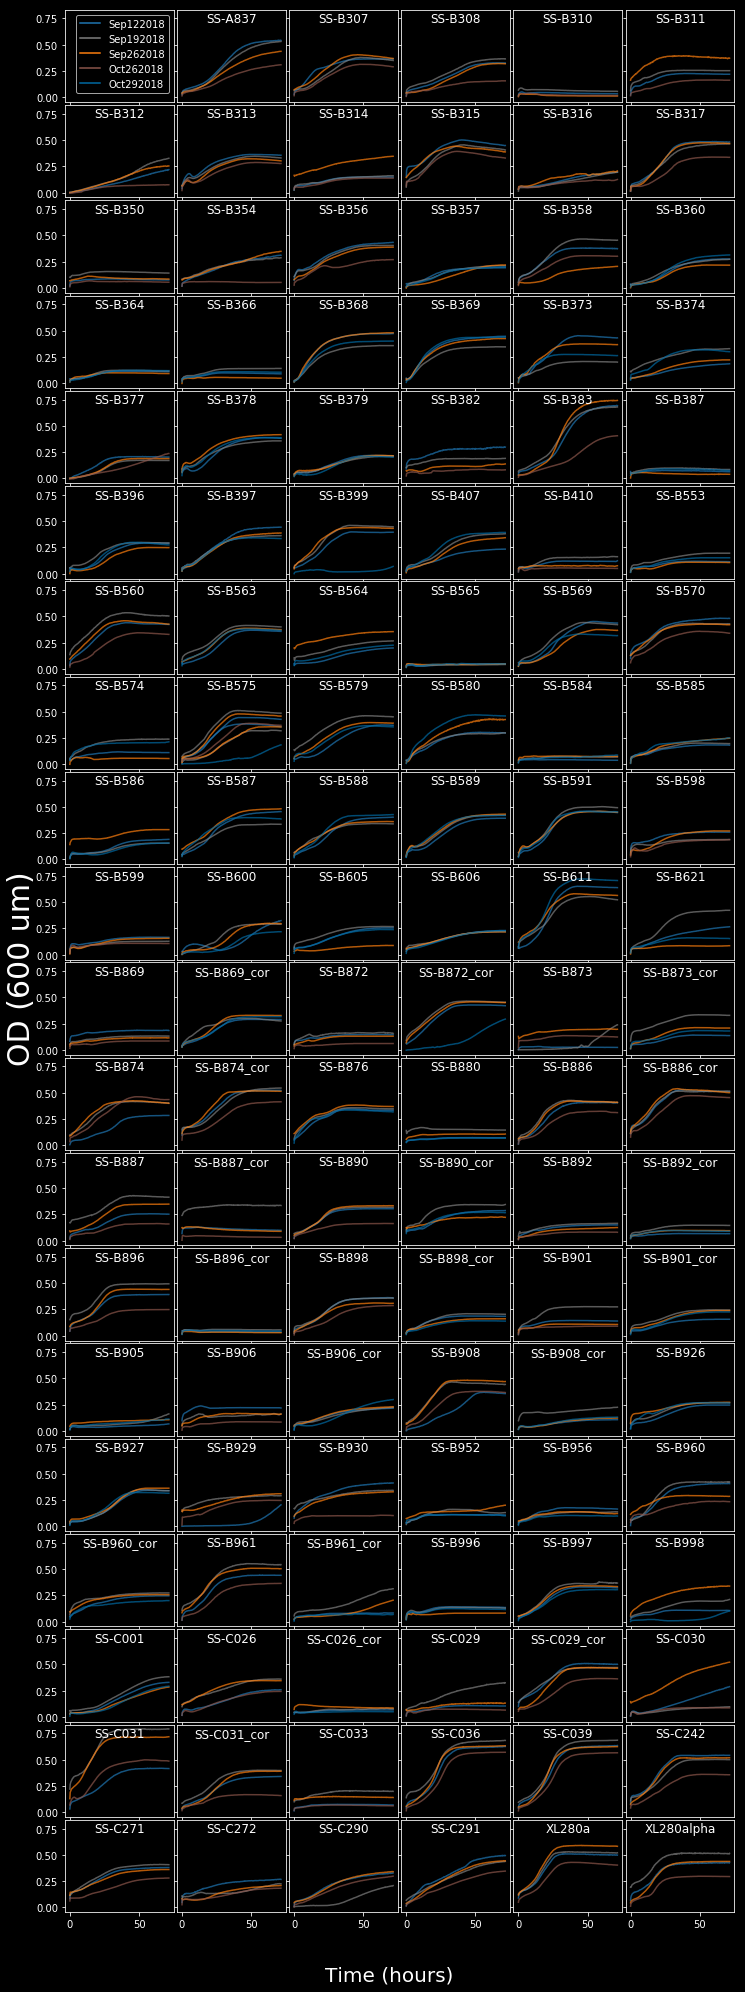

In [49]:
## Plot High temp growth for DM
fig, ax = plt.subplots(20,6,sharex=True,
                       sharey=True,
                       figsize=(12,35));
for i, s in enumerate(uss):
    plt.sca(ax.ravel()[i+1])
    temp = htg[(htg.strain==s)]
    for j in temp.index:
        mc = color_map[(color_map.date==temp.loc[j,
                    'date'])]['color'].values[0]
        plt.plot(time,temp.loc[j,htg_c[timeix:]],
                 color=mc,alpha=0.7)
    plt.title(s,y=0.8)
plt.sca(ax[0,0])
for i,date in enumerate(color_map['date'].values):
    plt.plot(0,np.nan,label=date,color=
             color_map[
                 (color_map.date==date)]
             ['color'].values[0])
plt.legend();
fig.text(0.5,0.1,'Time (hours)',
         fontsize=20,va='center',
         ha='center')
fig.text(0.075,0.5,'OD (600 um)',
         fontsize=30,va='center',ha='center',
         rotation=90);
plt.subplots_adjust(wspace=0.03,hspace=0.03)
fig.savefig(htg_OD,dpi=150,bbox_inches='tight');